In [1]:
import pandas as pd
from holoviews import *
from IPython.display import HTML
%load_ext holoviews.ipython

In [2]:
%output holomap='widgets'

In [3]:
df = pd.DataFrame({'a':[1,2,3,4], 'b':[4,5,6,7], 'c':[8, 9, 10, 11]})
HTML(df.to_html())

,a,b,c
0,1,4,8
1,2,5,9
2,3,6,10
3,4,7,11


In [4]:
example = DFrame(df)

In [5]:
list(example.data.columns)

['a', 'b', 'c']

:Table   [a,b]   (c)
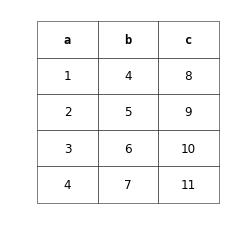

In [6]:
example_table = example.table(['a', 'b'], 'c')
example_table

In [7]:
HTML(df.reset_index().to_html())

,index,a,b,c
0,0,1,4,8
1,1,2,5,9
2,2,3,6,10
3,3,4,7,11


In [8]:
example_table.info

Table containing 4 items of type tuple
--------------------------------------

Key_dimensions Dimensions: 
	 a: 1.0...4.0 
	 b: 4.0...7.0 
Value_dimensions Dimensions: 
	 c: 8.0...11.0 



:Layout
   .Table.I  :Table   [a,b]   (c)
   .Table.II :Table   [a,b]   (c)
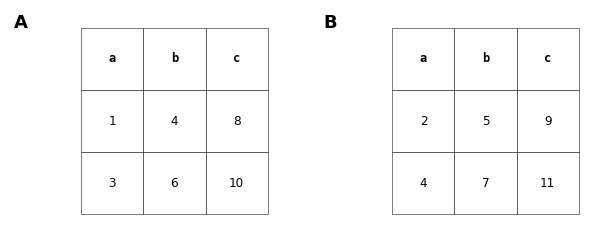

In [9]:
example_table[:, 4:8:2] + example_table[2:5:2, :]

:HoloMap   [c]
   :Scatter   [a]   (b)
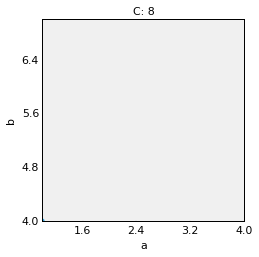
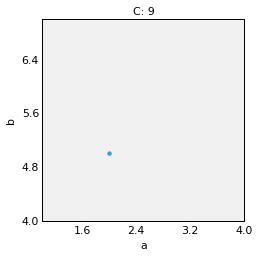
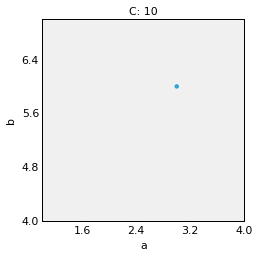
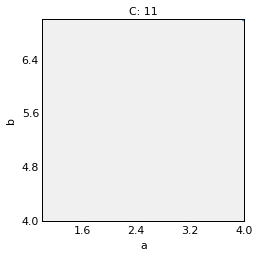

In [10]:
example.scatter('a', 'b')

:Layout
   .Curve.I :Curve   [a]   (b)
   .Table.I :Table   [a,b]   (c)
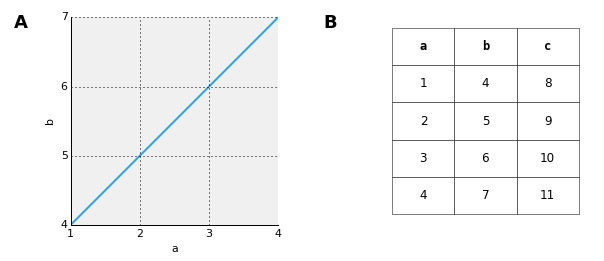

In [11]:
%%opts Curve [xticks=3 yticks=3]
example.curve(['a'], ['b'], reduce_fn=np.mean) + example_table

In [12]:
HTML(example_table.dframe().to_html())

,a,b,c
0,1,4,8
1,2,5,9
2,3,6,10
3,4,7,11


In [13]:
from io import BytesIO
try:
    from urllib2 import urlopen, Request
except:
    from urllib.request import urlopen, Request
macro_csv=BytesIO(urlopen('http://ioam.github.com/holoviews/Tutorials/macro.csv').read())
macro_df = pd.read_csv(macro_csv, '\t')

In [14]:
HTML(macro_df[0:10].to_html())

,country,year,gdp,unem,capmob,trade
0,United States,1966,5.111141,3.8,0,9.622906
1,United States,1967,2.277283,3.8,0,9.983546
2,United States,1968,4.700000,3.6,0,10.089120
3,United States,1969,2.800000,3.5,0,10.435930
4,United States,1970,-0.200000,4.9,0,10.495350
5,United States,1971,3.100000,5.9,0,11.278270
6,United States,1972,5.400000,5.6,0,11.217710
7,United States,1973,5.700000,4.9,0,11.767050
8,United States,1974,-0.900000,5.6,0,13.772550
9,United States,1975,-0.800000,8.5,0,17.423260


In [15]:
dimensions = {'unem': Dimension('Unemployment', unit='%'),
              'capmob': 'Capital Mobility',
              'gdp': Dimension('GDP Growth', unit='%')}
macro = DFrame(macro_df, dimensions=dimensions)

In [16]:
%output dpi=100
opts = Options('plot', aspect=2, figure_size=250, show_grid=True, legend_position='right')
Store.options.NdOverlay = opts
Store.options.Overlay = opts

:NdOverlay   [country]
   :Curve   [year]   (GDP Growth)
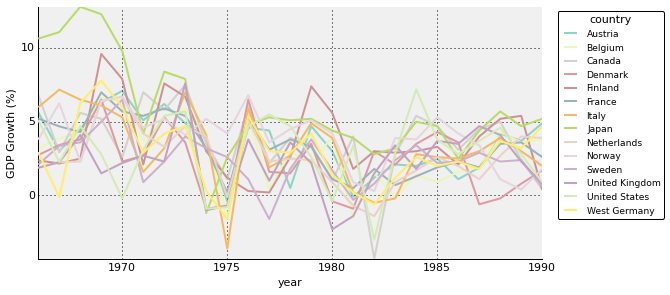

In [17]:
%%opts Curve (color=Palette('Set3'))
gdp_curves = macro.curve('year', 'GDP Growth', ['country'])
gdp_curves.overlay('country')